In [31]:
#dDownloading stock data using yfinance
import yfinance as yf

In [32]:
sp500 = yf.Ticker("^GSPC")

In [33]:
sp500 = sp500.history(period='max')

In [34]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-15 00:00:00-04:00,4126.649902,4141.250000,4110.270020,4136.279785,3562170000,0.0,0.0
2023-05-16 00:00:00-04:00,4127.950195,4135.540039,4109.859863,4109.899902,3654200000,0.0,0.0
2023-05-17 00:00:00-04:00,4122.850098,4164.669922,4113.620117,4158.770020,4039080000,0.0,0.0


In [35]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-05-08 00:00:00-04:00', '2023-05-09 00:00:00-04:00',
               '2023-05-10 00:00:00-04:00', '2023-05-11 00:00:00-04:00',
               '2023-05-12 00:00:00-04:00', '2023-05-15 00:00:00-04:00',
               '2023-05-16 00:00:00-04:00', '2023-05-17 00:00:00-04:00',
               '2023-05-18 00:00:00-04:00', '2023-05-19 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23961, freq=None)

## Cleaning and Visualizing the stock data

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Date'>

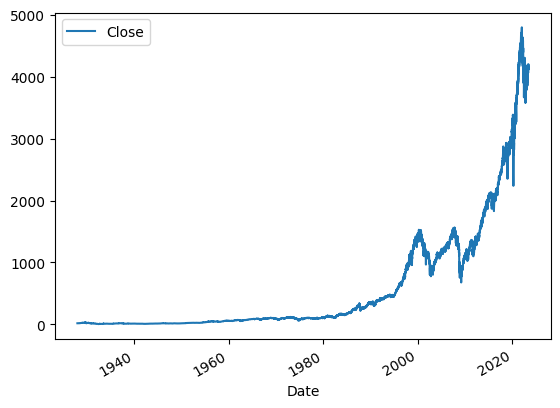

In [37]:
sp500.plot.line(y='Close', use_index=True)

In [38]:
#Removing dividends and stock splits columns
del sp500['Dividends']
del sp500['Stock Splits']

In [39]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


### Setting up our target for machine learning

In [40]:
#Will the stock go up or down tomorrow?
sp500['Tomorrow'] = sp500['Close'].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-05-15 00:00:00-04:00,4126.649902,4141.250000,4110.270020,4136.279785,3562170000,4109.899902
2023-05-16 00:00:00-04:00,4127.950195,4135.540039,4109.859863,4109.899902,3654200000,4158.770020
2023-05-17 00:00:00-04:00,4122.850098,4164.669922,4113.620117,4158.770020,4039080000,4198.049805


In [41]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

In [42]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-05-15 00:00:00-04:00,4126.649902,4141.250000,4110.270020,4136.279785,3562170000,4109.899902,0
2023-05-16 00:00:00-04:00,4127.950195,4135.540039,4109.859863,4109.899902,3654200000,4158.770020,1
2023-05-17 00:00:00-04:00,4122.850098,4164.669922,4113.620117,4158.770020,4039080000,4198.049805,1


In [43]:
sp500 = sp500.loc["1990-01-01":].copy()

In [44]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-05-15 00:00:00-04:00,4126.649902,4141.250000,4110.270020,4136.279785,3562170000,4109.899902,0
2023-05-16 00:00:00-04:00,4127.950195,4135.540039,4109.859863,4109.899902,3654200000,4158.770020,1
2023-05-17 00:00:00-04:00,4122.850098,4164.669922,4113.620117,4158.770020,4039080000,4198.049805,1


In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [46]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [47]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [48]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])

In [49]:
import pandas as pd

preds = pd.Series(preds, index=test.index)
preds

Date
2022-12-27 00:00:00-05:00    0
2022-12-28 00:00:00-05:00    0
2022-12-29 00:00:00-05:00    0
2022-12-30 00:00:00-05:00    0
2023-01-03 00:00:00-05:00    0
                            ..
2023-05-15 00:00:00-04:00    0
2023-05-16 00:00:00-04:00    1
2023-05-17 00:00:00-04:00    0
2023-05-18 00:00:00-04:00    0
2023-05-19 00:00:00-04:00    0
Length: 100, dtype: int32

In [50]:
precision_score(test['Target'], preds)

0.5625

In [51]:
combined = pd.concat([test['Target'], preds], axis=1)

<Axes: xlabel='Date'>

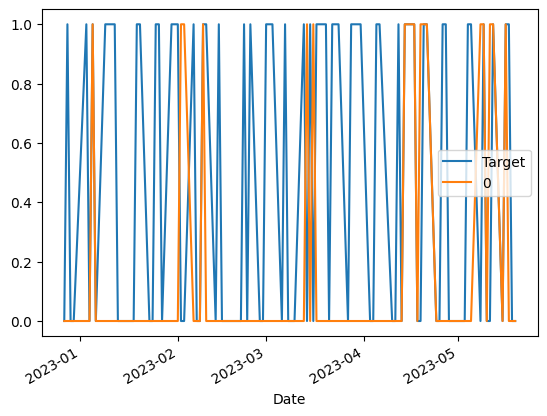

In [52]:
combined.plot()

In [53]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [54]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [55]:
predictions = backtest(sp500, model, predictors)

In [56]:
predictions['Predictions'].value_counts()

Predictions
0    3426
1    2485
Name: count, dtype: int64

In [57]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5283702213279678

In [58]:
predictions['Target'].value_counts()/predictions.shape[0]

Target
1    0.533581
0    0.466419
Name: count, dtype: float64

In [61]:
import numpy as np 

horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_average = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]

    trend_column =f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [62]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-15 00:00:00-04:00,4126.649902,4141.250000,4110.270020,4136.279785,3562170000,4109.899902,0,1.001477,1.0,1.001628,2.0,1.021520,30.0,1.043435,115.0,1.103909,533.0
2023-05-16 00:00:00-04:00,4127.950195,4135.540039,4109.859863,4109.899902,3654200000,4158.770020,1,0.996801,1.0,0.995687,2.0,1.014876,30.0,1.036758,114.0,1.096486,533.0
2023-05-17 00:00:00-04:00,4122.850098,4164.669922,4113.620117,4158.770020,4039080000,4198.049805,1,1.005910,1.0,1.006496,2.0,1.026262,31.0,1.048837,115.0,1.109117,534.0


In [63]:
sp500 = sp500.dropna()

In [64]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 00:00:00-04:00,4138.540039,4143.740234,4099.120117,4124.080078,3533740000,4136.279785,1,0.999208,0.0,0.998584,2.0,1.018699,29.0,1.040492,114.0,1.101038,533.0
2023-05-15 00:00:00-04:00,4126.649902,4141.250000,4110.270020,4136.279785,3562170000,4109.899902,0,1.001477,1.0,1.001628,2.0,1.021520,30.0,1.043435,115.0,1.103909,533.0
2023-05-16 00:00:00-04:00,4127.950195,4135.540039,4109.859863,4109.899902,3654200000,4158.770020,1,0.996801,1.0,0.995687,2.0,1.014876,30.0,1.036758,114.0,1.096486,533.0


In [65]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [66]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [67]:
predictions = backtest(sp500, model, new_predictors)

In [68]:
predictions["Predictions"].value_counts()

Predictions
0.0    4096
1.0     814
Name: count, dtype: int64

In [69]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5687960687960688